In [1]:
# Import dependencies
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import numpy as np
import plotly.graph_objects as go
import mplcursors 
from sklearn.preprocessing import MinMaxScaler
from simplification.cutil import simplify_coords
from scipy.interpolate import interp1d

In [2]:
# Load the data into a Pandas DataFrame
full_df = pd.read_csv("akc-data-latest.csv",encoding='latin1')

# Rename columns
full_df.rename(columns={"Unnamed: 0": "Breed",
                              "description" : "Description",
                              "temperament": "Temperament",
                              "popularity": "Ranking",
                              "min_height":"Height (min)",
                              "max_height":"Height (max)",
                              "min_weight":"Weight (min)",
                              "max_weight":"Weight (max)", 
                              "min_expectancy":"Lifespan (min)", 
                              "max_expectancy":"Lifespan (max)", 
                              "group": "Breed Group", 
                              "grooming_frequency_value": "Grooming Frequency (value)", 
                              "grooming_frequency_category": "Grooming Frequency (group)",
                              "shedding_value": "Shedding (value)",
                              "shedding_category": "Shedding (group)",
                              "energy_level_value" : "Energy Level (value)",
                              "energy_level_category" : "Energy Level (group)",
                              "trainability_value" : "Trainability (value)",
                              "trainability_category" : "Trainability (group)",
                              "demeanor_value" : "Demeanor (value)",
                              "demeanor_category" : "Demeanor (group)"}, inplace=True)

#sorting
full_df=full_df.sort_values("Breed",ascending=True, inplace=False)
full_df=full_df.reset_index(drop=True)

#print
full_df.head()

,Breed,Description,Temperament,Ranking,Height (min),Height (max),Weight (min),Weight (max),Lifespan (min),Lifespan (max),...,Grooming Frequency (value),Grooming Frequency (group),Shedding (value),Shedding (group),Energy Level (value),Energy Level (group),Trainability (value),Trainability (group),Demeanor (value),Demeanor (group)
0,Affenpinscher,The Affenâs apish look has been described ma...,"Confident, Famously Funny, Fearless",148,22.86,29.21,3.175147,4.535924,12.0,15.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,63.50,68.58,22.679619,27.215542,12.0,15.0,...,0.8,Daily Brushing,0.2,Infrequent,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,58.42,58.42,22.679619,31.751466,11.0,14.0,...,0.6,2-3 Times a Week Brushing,0.4,Occasional,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly
3,Akita,"Akitas are burly, heavy-boned spitz-type dogs ...","Courageous, Dignified, Profoundly Loyal",47,60.96,71.12,31.751466,58.967008,10.0,13.0,...,0.8,Daily Brushing,0.6,Seasonal,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive
4,Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,"Affectionate, Loyal, Playful",58,58.42,63.50,34.019428,38.555351,10.0,14.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.8,Friendly


In [3]:
#copy df
full_numberic_df = full_df.copy()
full_numberic_df = full_numberic_df.drop(columns=['Description',
                                                  'Temperament',
                                                  'Grooming Frequency (group)',
                                                  'Shedding (group)',
                                                  'Energy Level (group)',
                                                  'Trainability (group)',
                                                  'Demeanor (group)'])
#astype changes
full_numberic_df["Height (min)"] = full_numberic_df["Height (min)"].astype("float64")
full_numberic_df["Height (max)"] = full_numberic_df["Height (max)"].astype("float64")
full_numberic_df["Weight (min)"] = full_numberic_df["Weight (min)"].astype("float64")
full_numberic_df["Weight (max)"] = full_numberic_df["Weight (max)"].astype("float64")
full_numberic_df["Lifespan (min)"] = full_numberic_df["Lifespan (min)"].astype("float64")
full_numberic_df["Lifespan (max)"] = full_numberic_df["Lifespan (max)"].astype("float64")
full_numberic_df["Grooming Frequency (value)"] = full_numberic_df["Grooming Frequency (value)"].astype("float64")
full_numberic_df["Shedding (value)"] = full_numberic_df["Shedding (value)"].astype("float64")
full_numberic_df["Energy Level (value)"] = full_numberic_df["Energy Level (value)"].astype("float64")
full_numberic_df["Trainability (value)"] = full_numberic_df["Trainability (value)"].astype("float64")
full_numberic_df["Demeanor (value)"] = full_numberic_df["Demeanor (value)"].astype("float64")

#print
full_numberic_df.head()

,Breed,Ranking,Height (min),Height (max),Weight (min),Weight (max),Lifespan (min),Lifespan (max),Breed Group,Grooming Frequency (value),Shedding (value),Energy Level (value),Trainability (value),Demeanor (value)
0,Affenpinscher,148,22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,0.6,0.6,0.8,1.0
1,Afghan Hound,113,63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,0.2,0.8,0.2,0.2
2,Airedale Terrier,60,58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,0.4,0.6,1.0,0.8
3,Akita,47,60.96,71.12,31.751466,58.967008,10.0,13.0,Working Group,0.8,0.6,0.8,1.0,0.6
4,Alaskan Malamute,58,58.42,63.50,34.019428,38.555351,10.0,14.0,Working Group,0.6,0.6,0.8,0.4,0.8


In [4]:
copy_numberic_df = full_numberic_df.copy()
copy_numberic_df = copy_numberic_df.drop(columns=['Ranking',
                                                  'Breed Group',
                                                  'Grooming Frequency (value)',
                                                  'Shedding (value)',
                                                  'Energy Level (value)',
                                                  'Trainability (value)',
                                                  'Demeanor (value)'])

#dropping rows if missing values
copy_numberic_df= copy_numberic_df.dropna(axis=0,how="any")

#adding new columns for average values
copy_numberic_df["Height (avg)"] = copy_numberic_df[["Height (min)","Height (max)"]].mean(axis=1)
copy_numberic_df["Weight (avg)"] = copy_numberic_df[["Weight (min)","Weight (max)"]].mean(axis=1)
copy_numberic_df["Lifespan (avg)"] = copy_numberic_df[["Lifespan (min)","Lifespan (max)"]].mean(axis=1)

#dropping more columns
copy_numberic_df = copy_numberic_df.drop(columns=['Height (min)',
                                                  'Height (max)',
                                                  'Weight (min)',
                                                  'Weight (max)',
                                                  'Height (min)',
                                                  'Lifespan (min)',
                                                  'Lifespan (max)'])

#print
copy_numberic_df.head()

,Breed,Height (avg),Weight (avg),Lifespan (avg)
0,Affenpinscher,26.035,3.855535,13.5
1,Afghan Hound,66.040,24.947580,13.5
2,Airedale Terrier,58.420,27.215542,12.5
3,Akita,66.040,45.359237,11.5
4,Alaskan Malamute,60.960,36.287390,12.0


In [5]:
#merging
final_df = pd.merge(full_numberic_df, copy_numberic_df, how="left", on=["Breed", "Breed"])

# reorder + cleaning
final_df = pd.DataFrame({"Breed":final_df["Breed"],
                         "Breed Group":final_df["Breed Group"],
                         "Ranking":final_df["Ranking"],
                         "Height (avg)":final_df["Height (avg)"],
                         "Weight (avg)":final_df["Weight (avg)"],
                         "Lifespan (avg)":final_df["Lifespan (avg)"],
                         "Grooming Frequency (value)":final_df["Grooming Frequency (value)"],
                         "Shedding (value)":final_df["Shedding (value)"],
                         "Energy Level (value)":final_df["Energy Level (value)"],
                         "Trainability (value)":final_df["Trainability (value)"],
                         "Demeanor (value)":final_df["Demeanor (value)"]})

#sorting
final_df=final_df.sort_values("Breed",ascending=True, inplace=False)
final_df=final_df.reset_index(drop=True)

#print
final_df

,Breed,Breed Group,Ranking,Height (avg),Weight (avg),Lifespan (avg),Grooming Frequency (value),Shedding (value),Energy Level (value),Trainability (value),Demeanor (value)
0,Affenpinscher,Toy Group,148,26.035,3.855535,13.5,0.6,0.6,0.6,0.8,1.0
1,Afghan Hound,Hound Group,113,66.040,24.947580,13.5,0.8,0.2,0.8,0.2,0.2
2,Airedale Terrier,Terrier Group,60,58.420,27.215542,12.5,0.6,0.4,0.6,1.0,0.8
3,Akita,Working Group,47,66.040,45.359237,11.5,0.8,0.6,0.8,1.0,0.6
4,Alaskan Malamute,Working Group,58,60.960,36.287390,12.0,0.6,0.6,0.8,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,Sporting Group,167,59.055,24.947580,13.0,0.2,0.6,0.8,0.6,0.6
273,Working Kelpie,Foundation Stock Service,NaN,55.880,19.958064,13.5,0.2,0.6,0.8,0.4,0.6
274,Xoloitzcuintli,Non-Sporting Group,140,41.910,14.741752,15.5,0.2,0.2,0.8,0.6,0.6
275,Yakutian Laika,Foundation Stock Service,NaN,55.880,21.545638,11.0,0.4,0.6,0.8,0.2,0.4


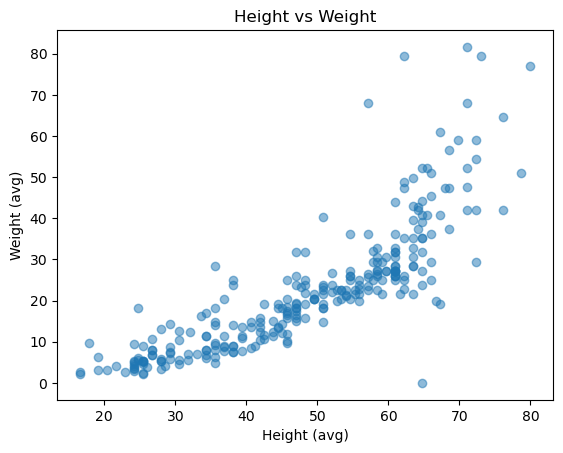

In [6]:
import matplotlib.pyplot as plt

# Copy for graphing
graph_1_df = final_df[["Breed", "Height (avg)", "Weight (avg)"]]

# Select the columns for the bubble chart
x = graph_1_df['Height (avg)']
y = graph_1_df['Weight (avg)']
# size = graph_1_df['Ranking']  # If this is not used, you can remove/comment it out

# Create the scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, alpha=0.5)

# Customize the plot
ax.set_xlabel('Height (avg)')
ax.set_ylabel('Weight (avg)')
ax.set_title('Height vs Weight')

# Create a function to display hover text using mplcursors
def on_hover(event):
    breed = graph_1_df['Breed'][event.ind]
    label = f"Breed: {breed}"
    mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(label))

# Connect the hover function to the scatter plot
scatter.hover = on_hover

# Show the plot
plt.show()

In [7]:
# Convert relevant columns to numeric
numeric_columns = final_df.columns[2:]
final_df[numeric_columns] = final_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate overall averages for each column
overall_averages = final_df.drop(["Breed", "Breed Group"], axis=1).mean()

# Group by 'Breed Group' and calculate averages for each group
grouped_averages = final_df.groupby('Breed Group').mean()

# Create the new DataFrame 'Filtered_df'
column_names = final_df.columns[2:]  # Exclude 'Breed' and 'Breed Group'

# Initialize a dictionary to store the data
averages_data = {
    'Titles': column_names.tolist(),
    'All Row averages': overall_averages[column_names].values.tolist(),
}

# Iterate through the unique values of 'Breed Group'
for group in grouped_averages.index:
    group_averages = grouped_averages.loc[group, column_names].values.tolist()
    averages_data[group] = group_averages

Filtered_df = pd.DataFrame(averages_data)

#print
Filtered_df

,Titles,All Row averages,Foundation Stock Service,Herding Group,Hound Group,Miscellaneous Class,Non-Sporting Group,Sporting Group,Terrier Group,Toy Group,Working Group
0,Ranking,95.784615,NaN,107.733333,126.806452,NaN,81.000000,90.967742,109.483871,67.095238,73.033333
1,Height (avg),48.347546,52.655391,49.879250,56.078437,42.891364,36.678810,53.155645,35.150323,24.765000,64.196452
2,Weight (avg),22.524113,27.153528,22.150427,25.252338,14.999475,12.830184,23.308795,11.010589,4.314527,42.813267
3,Lifespan (avg),12.579044,12.546875,12.316667,12.296875,13.227273,13.285714,12.596774,13.483871,13.857143,10.693548
4,Grooming Frequency (value),0.425926,0.326984,0.513333,0.350000,0.345455,0.490000,0.443750,0.493333,0.523810,0.458065
5,Shedding (value),0.529183,0.558621,0.580000,0.493750,0.560000,0.520000,0.579310,0.407407,0.438095,0.580000
6,Energy Level (value),0.712915,0.681250,0.766667,0.712500,0.781818,0.660000,0.812500,0.686667,0.590476,0.741935
7,Trainability (value),0.624506,0.583333,0.706667,0.462500,0.780000,0.600000,0.800000,0.566667,0.619048,0.620000
8,Demeanor (value),0.620635,0.527660,0.546667,0.643750,0.620000,0.680000,0.668750,0.680000,0.714286,0.600000


In [8]:
# Calculate scaling factors based on maximum values of each column
scaling_factors = {}
for column in column_names:
    max_value = final_df[column].max()
    scaling_factors[column] = 1 / max_value

# Apply scaling factors to the averages
for column in column_names:
    if column in scaling_factors:
        overall_averages[column] *= scaling_factors[column]
        grouped_averages[column] *= scaling_factors[column]

# Initialize a dictionary to store scaled data
scaled_averages_data = {
    'Titles': column_names.tolist(),
    'All Row averages': overall_averages[column_names].values.tolist(),
}

# Iterate through the unique values of 'Breed Group' for scaled values
for group in grouped_averages.index:
    group_averages = grouped_averages.loc[group, column_names].values.tolist()
    scaled_averages_data[group] = group_averages

# Create the scaled DataFrame 'Scaled_Filtered_df'
Scaled_Filtered_df = pd.DataFrame(scaled_averages_data)

# Print the scaled DataFrame
Scaled_Filtered_df

,Titles,All Row averages,Foundation Stock Service,Herding Group,Hound Group,Miscellaneous Class,Non-Sporting Group,Sporting Group,Terrier Group,Toy Group,Working Group
0,Ranking,0.498878,NaN,0.561111,0.660450,NaN,0.421875,0.473790,0.570228,0.349454,0.380382
1,Height (avg),0.604269,0.658110,0.623413,0.700893,0.536075,0.458428,0.664363,0.439324,0.309524,0.802355
2,Weight (avg),0.275873,0.332574,0.271296,0.309288,0.183712,0.157143,0.285484,0.134857,0.052844,0.524373
3,Lifespan (avg),0.739944,0.738051,0.724510,0.723346,0.778075,0.781513,0.740987,0.793169,0.815126,0.629032
4,Grooming Frequency (value),0.425926,0.326984,0.513333,0.350000,0.345455,0.490000,0.443750,0.493333,0.523810,0.458065
5,Shedding (value),0.529183,0.558621,0.580000,0.493750,0.560000,0.520000,0.579310,0.407407,0.438095,0.580000
6,Energy Level (value),0.712915,0.681250,0.766667,0.712500,0.781818,0.660000,0.812500,0.686667,0.590476,0.741935
7,Trainability (value),0.624506,0.583333,0.706667,0.462500,0.780000,0.600000,0.800000,0.566667,0.619048,0.620000
8,Demeanor (value),0.620635,0.527660,0.546667,0.643750,0.620000,0.680000,0.668750,0.680000,0.714286,0.600000


In [10]:
# Your DataFrame with the scaled data, replace this with your actual DataFrame
# Scaled_Filtered_df = ...

# Fill NaN values with a placeholder value (e.g., -1) that won't be displayed on the radar chart
Scaled_Filtered_df.fillna(0, inplace=True)

# Create the radar chart using Plotly Express
fig = px.line_polar(
    Scaled_Filtered_df,
    r="All Row averages",
    theta="Titles",
    line_close=True,
    title="Radar Chart",
    color_discrete_sequence=['red'],  # Set line color
    line_dash_sequence=['solid']      # Set line style
)

# Add a trace for the Foundation Stock Service column
#fig.add_trace(
    #px.line_polar(
        #Scaled_Filtered_df,
        #r="Foundation Stock Service",
        #theta="Titles",
        #line_close=True,
        #color_discrete_sequence=['blue'],  # Set line color
        #line_dash_sequence=['solid']       # Set line style
    #).data[0]
#)

# Set the fill options for each plot
fig.update_traces(fill='toself')

# Show the radar chart
fig.show()